## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y = -1*x + 2
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

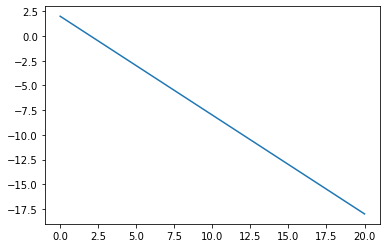

In [4]:
plt.plot(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

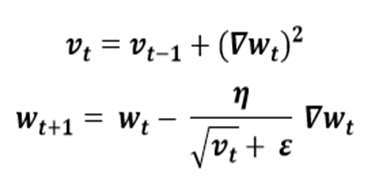

In [5]:
theta_0 = 0
theta_1 = 0
alpha = 0.1
iterations = 100
beta = 0.7
beta2 = 0.8

In [6]:
def calc_cost_vectorize(theta_0,theta_1,x,y):
    sigma=[]
    sigma = ((theta_0 + theta_1 * x) - y)**2
    sigma = sigma.sum()
    return sigma/(2*len(x))
    
j = calc_cost_vectorize(0,0,x,y)
j

49.34693877551021

In [7]:
def theta_0_diff_vectorize(theta_0,theta_1,x,y):
    sigma = []
    sigma = ((theta_0 + theta_1 * x)-y)
    sigma = sigma.sum()
    return sigma/(len(x))

dt0 = theta_0_diff_vectorize(0,0,x,y)
dt0

8.0

In [8]:
def theta_1_diff_vectorize(theta_0,theta_1,x,y):
    sigma = []
    sigma = ((theta_0 + theta_1 * x)-y)*x
    sigma = sigma.sum()
    return sigma/(len(x))

dt1 = theta_1_diff_vectorize(0,0,x,y)
dt1

114.69387755102042

In [9]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def adagrad(theta_0,theta_1,x,y,alpha,epochs,eps):
    v0 = 0
    v1 = 0
    for i in range(iterations):
        hypo = theta_0 + theta_1*x
        hypo_list.append(hypo)
        j = calc_cost_vectorize(theta_0,theta_1,x,y)
        loss.append(j)
        dt0 = theta_0_diff_vectorize(theta_0,theta_1,x,y)
        dt1 = theta_1_diff_vectorize(theta_0,theta_1,x,y)
        v0=v0+dt0**2
        v1=v1+dt1**2
        theta_0 = theta_0 - ((alpha/((v0**0.5)+eps)) * dt0)
        theta_0_list.append(theta_0)
        theta_1 = theta_1 - ((alpha/((v1**0.5)+eps)) * dt1)
        theta_1_list.append(theta_1)
    return theta_0 , theta_1

theta_0,theta_1 = adagrad(theta_0,theta_1,x,y,alpha,iterations,10**-8)
print(theta_0,theta_1)

-0.5324517487444937 -0.8024958353011563


In [10]:
hypo = theta_0 + theta_1*x

In [11]:
from sklearn.metrics import r2_score
r2_score(y, hypo)

0.9520364607763502

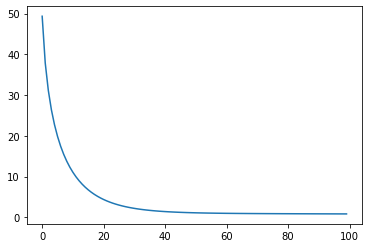

In [12]:
plt.plot(loss)

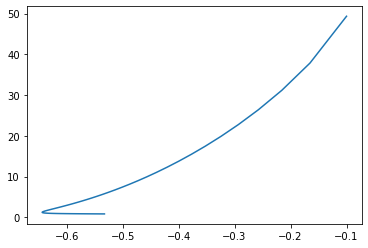

In [13]:
plt.plot(theta_0_list,loss)

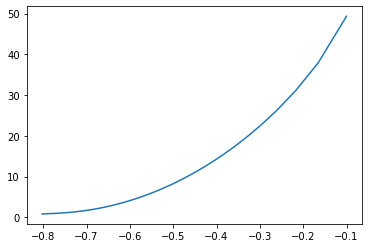

In [14]:
plt.plot(theta_1_list,loss)

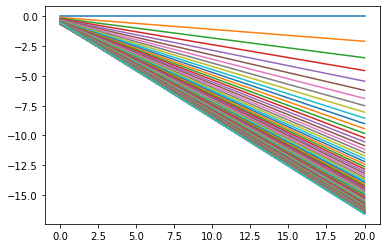

In [15]:
for i in range(iterations):
    plt.plot(x,hypo_list[i])

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

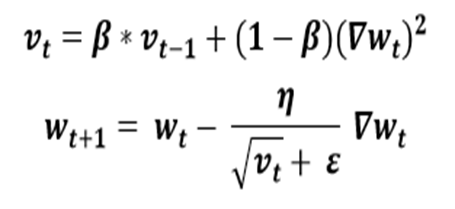

In [16]:
def calc_cost_vectorize(theta_0,theta_1,x,y):
    sigma=[]
    sigma = ((theta_0 + theta_1 * x)-y)**2
    sigma = sigma.sum()
    return sigma/(2*len(x))
    
j = calc_cost_vectorize(0,0,x,y)
j

49.34693877551021

In [17]:
def theta_0_diff_vectorize(theta_0,theta_1,x,y):
    sigma = []
    sigma = ((theta_0 + theta_1 * x)-y)
    sigma = sigma.sum()
    return sigma/(len(x))

dt0 = theta_0_diff_vectorize(0,0,x,y)
dt0

8.0

In [18]:
def theta_1_diff_vectorize(theta_0,theta_1,x,y):
    sigma = []
    sigma = ((theta_0 + theta_1 * x)-y)*x
    sigma = sigma.sum()
    return sigma/(len(x))

dt1 = theta_1_diff_vectorize(0,0,x,y)
dt1

114.69387755102042

In [19]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def rms_prop(theta_0,theta_1,x,y,alpha,epochs,beta,eps):
    v0 = 0
    v1 = 0
    for i in range(iterations):
        hypo = theta_0 + theta_1*x
        hypo_list.append(hypo)
        j = calc_cost_vectorize(theta_0,theta_1,x,y)
        loss.append(j)
        dt0 = theta_0_diff_vectorize(theta_0,theta_1,x,y)
        dt1 = theta_1_diff_vectorize(theta_0,theta_1,x,y)
        v0=beta*v0 + (1-beta)*dt0**2
        v1=beta*v1 + (1-beta)*dt1**2
        theta_0 = theta_0 - ((alpha/((v0**0.5)+eps)) * dt0)
        theta_0_list.append(theta_0)
        theta_1 = theta_1 - ((alpha/((v1**0.5)+eps)) * dt1)
        theta_1_list.append(theta_1)
    return theta_0 , theta_1

theta_0,theta_1 = rms_prop(theta_0,theta_1,x,y,alpha,iterations,beta,10**-8)
print(theta_0,theta_1)

1.9824849057419949 -0.9448695656324325


In [20]:
hypo = theta_0 + theta_1*x

In [21]:
from sklearn.metrics import r2_score
r2_score(y, hypo)

0.9887479192200316

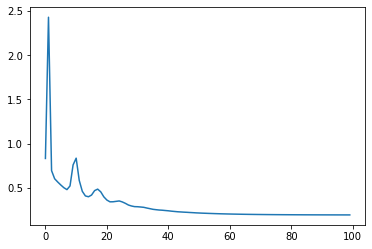

In [22]:
plt.plot(loss)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_22252/1381536874.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(theta_0_list,loss,MARKER=".")


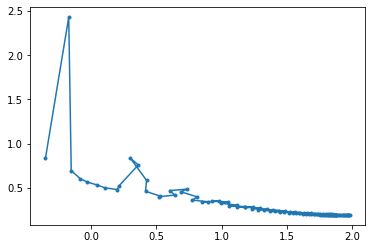

In [23]:
plt.plot(theta_0_list,loss,MARKER=".")

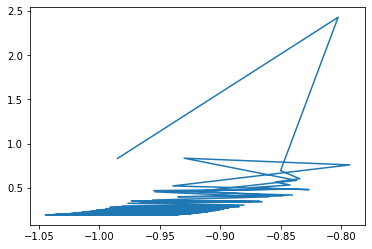

In [24]:
plt.plot(theta_1_list,loss)

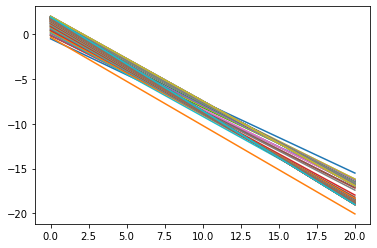

In [25]:
for i in range(iterations):
    plt.plot(x,hypo_list[i])

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

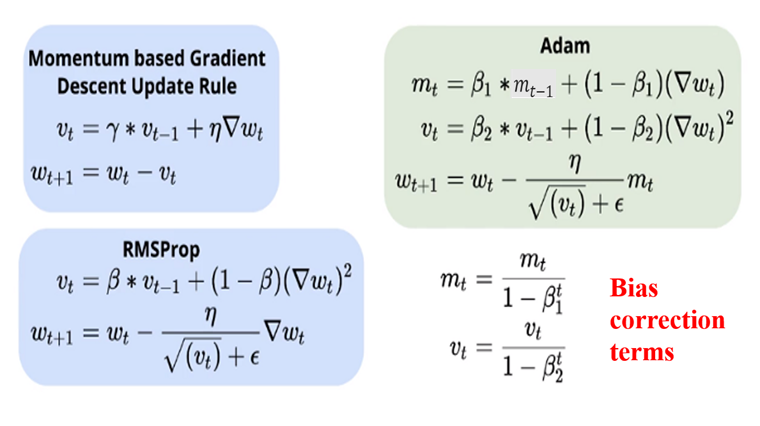

In [26]:
def calc_cost_vectorize(theta_0,theta_1,x,y):
    sigma=[]
    sigma = ((theta_0 + theta_1 * x)-y)**2
    sigma = sigma.sum()
    return sigma/(2*len(x))
    
j = calc_cost_vectorize(0,0,x,y)
j

49.34693877551021

In [27]:
def theta_0_diff_vectorize(theta_0,theta_1,x,y):
    sigma = []
    sigma = ((theta_0 + theta_1 * x)-y)
    sigma = sigma.sum()
    return sigma/(len(x))

dt0 = theta_0_diff_vectorize(0,0,x,y)
dt0

8.0

In [28]:
def theta_1_diff_vectorize(theta_0,theta_1,x,y):
    sigma = []
    sigma = ((theta_0 + theta_1 * x)-y)*x
    sigma = sigma.sum()
    return sigma/(len(x))

dt1 = theta_1_diff_vectorize(0,0,x,y)
dt1

114.69387755102042

In [29]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def adam(theta_0,theta_1,x,y,alpha,epochs,beta,eps):
    v0 = 0
    v1 = 0
    m0 = 0
    m1 = 0
    for i in range(iterations):
        hypo = theta_0 + theta_1*x
        hypo_list.append(hypo)
        j = calc_cost_vectorize(theta_0,theta_1,x,y)
        loss.append(j)
        dt0 = theta_0_diff_vectorize(theta_0,theta_1,x,y)
        dt1 = theta_1_diff_vectorize(theta_0,theta_1,x,y)
       
        m0=beta2*m0 + (1-beta2)*dt0
        m1=beta2*m1 + (1-beta2)*dt1
        
        v0=beta*v0 + (1-beta)*dt0**2
        v1=beta*v1 + (1-beta)*dt1**2
        
        mt0 = m0 / (1-beta2**(i+1))
        mt1 = m1 / (1-beta2**(i+1))
        
        vt0 = v0 / (1-beta**(i+1))
        vt1 = v1 / (1-beta**(i+1))

        theta_0 = theta_0 - ((alpha/((vt0**0.5)+eps)) * mt0)
        theta_0_list.append(theta_0)
        theta_1 = theta_1 - ((alpha/((vt1**0.5)+eps)) * mt1)
        theta_1_list.append(theta_1)
    return theta_0 , theta_1

theta_0,theta_1 = adam(theta_0,theta_1,x,y,alpha,iterations,beta,10**-8)
print(theta_0,theta_1)

2.007024635827789 -0.9929771568016664


In [30]:
hypo = theta_0 + theta_1*x

In [31]:
from sklearn.metrics import r2_score
r2_score(y, hypo)

0.9997786597982202

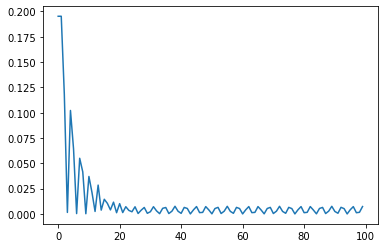

In [32]:
plt.plot(loss)

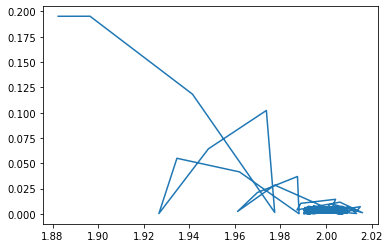

In [33]:
plt.plot(theta_0_list,loss)

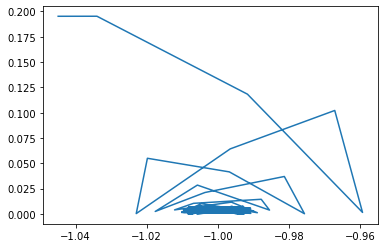

In [34]:
plt.plot(theta_1_list,loss)

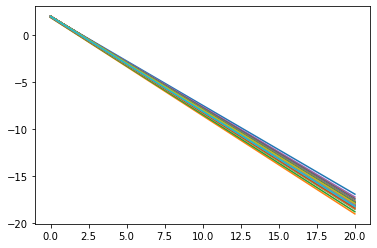

In [35]:
for i in range(iterations):
    plt.plot(x,hypo_list[i])